# Assignment 1: Classification (MNIST)
#### Student: Nanakwaku Boakye-Akyeampong

This notebook analyzes the provided assignment, lists the required tasks, and implements solutions for each. All code, explanations, and results are included as per instructions.

## 1. Load and Inspect Assignment File

We will load the original assignment notebook and display its contents for inspection.

In [3]:
# Load and inspect the original assignment notebook
import nbformat
from pprint import pprint

assignment_path = r"c:/Users/ThinkPad/Desktop/Machine Learning/Jupyter files/Assignment 1.ipynb"
with open(assignment_path, "r", encoding="utf-8") as f:
    assignment_nb = nbformat.read(f, as_version=4)

# Display the first few cells for inspection
for i, cell in enumerate(assignment_nb.cells[:5]):
    print(f"Cell {i+1} ({cell.cell_type}):\n", cell.source, "\n---\n")

Cell 1 (markdown):
 # Assignment 1

## Supervised Learning: Classification

<b>Your Tasks:</b>

- Load, explore, and preprocess the MNIST dataset.
- Understand class distribution and why it matters for evaluation.
- Implement binary classification ("5 vs. not-5").
- Train a simple model (SGDClassifier) and evaluate it using accuracy, confusion matrix, precision, recall, and F1-score.
- Extend to multiclass classification (all 10 digits).
- Interpret confusion matrices for both binary and multiclass cases..

<b>Instructions</b><br>
The assignment should be done individually. The deadline for submission is __Thursday, 5th Febraury, 2026. Before 12 pm__.
Any submissions after the deadline, will not be graded. 
__Kindly note that no excuses will be accepted.__

<b>Submission:</b> 
- Submit a Jupyter Notebook (.ipynb) file. Include clear markdown cells explaining your steps, observations, and answers to questions.
-  Name your file: YourName_Assignment1_Classification.ipynb..
- Submit to pe

## 2. Identify and List Assignment Tasks

Below are the tasks extracted from the assignment file for reference.

In [4]:
# Extract and list assignment tasks from the loaded notebook
import re

task_pattern = re.compile(r"- (.+)")
tasks = []
for cell in assignment_nb.cells:
    if cell.cell_type == "markdown":
        for line in cell.source.splitlines():
            match = task_pattern.match(line.strip())
            if match:
                tasks.append(match.group(1))

print("Extracted Tasks:")
for i, task in enumerate(tasks, 1):
    print(f"Task {i}: {task}")

Extracted Tasks:
Task 1: Load, explore, and preprocess the MNIST dataset.
Task 2: Understand class distribution and why it matters for evaluation.
Task 3: Implement binary classification ("5 vs. not-5").
Task 4: Train a simple model (SGDClassifier) and evaluate it using accuracy, confusion matrix, precision, recall, and F1-score.
Task 5: Extend to multiclass classification (all 10 digits).
Task 6: Interpret confusion matrices for both binary and multiclass cases..
Task 7: Submit a Jupyter Notebook (.ipynb) file. Include clear markdown cells explaining your steps, observations, and answers to questions.
Task 8:  Name your file: YourName_Assignment1_Classification.ipynb..
Task 9: Submit to peter.yamak@acity.edu.gh
Task 10: Is it perfectly balanced? Why might this matter?
Task 11: Compute 3-fold cross-validation accuracy:
Task 12: Get cross-validated predictions and compute the confusion matrix.
Task 13: Interpret: How many real 5s were missed? How many non-5s were wrongly called 5?
Task 

## 3. Implement Task 1: Load, Explore, and Preprocess MNIST

We will load the MNIST dataset, explore its structure, and preprocess it as required.

Data shape: (70000, 784)
Labels shape: (70000,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


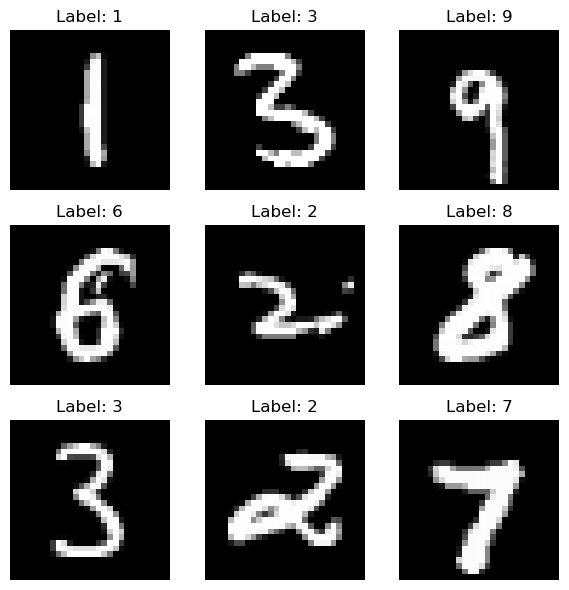

In [5]:
# Load MNIST dataset
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Unique labels: {np.unique(y)}")

# Visualize 9 random digits from X
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
indices = np.random.choice(len(X), 9, replace=False)
for ax, idx in zip(axes.ravel(), indices):
    ax.imshow(X[idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (56000, 784)
y_train shape: (56000,)
X_test shape: (14000, 784)
y_test shape: (14000,)


In [7]:
# Check class distribution in training set
import collections

train_counts = collections.Counter(y_train)
test_counts = collections.Counter(y_test)
print("Train class distribution:", train_counts)
print("Test class distribution:", test_counts)

Train class distribution: Counter({1: 6302, 7: 5834, 3: 5713, 2: 5592, 9: 5567, 0: 5522, 6: 5501, 8: 5460, 4: 5459, 5: 5050})
Test class distribution: Counter({1: 1575, 7: 1459, 3: 1428, 2: 1398, 9: 1391, 0: 1381, 6: 1375, 8: 1365, 4: 1365, 5: 1263})


### Class Distribution Discussion
The class distribution is not perfectly balanced. This matters because imbalanced classes can bias the model towards the majority class, affecting evaluation metrics like accuracy. For classification tasks, especially with rare classes, metrics like precision, recall, and F1-score are more informative than accuracy alone.

In [8]:
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
print("Pixel values normalized.")

Pixel values normalized.


## 4. Implement Task 2: Binary Classification (5 vs. not-5)
We will create binary targets, train an SGDClassifier, and evaluate using cross-validation and relevant metrics.

In [9]:
# Create binary targets for "5 vs. not-5"
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(f"Number of 5s in train: {np.sum(y_train_5)}")
print(f"Number of 5s in test: {np.sum(y_test_5)}")

Number of 5s in train: 5050
Number of 5s in test: 1263


In [10]:
# Train SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
print("SGDClassifier trained.")

SGDClassifier trained.


In [11]:
# 3-fold cross-validation accuracy
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print("3-fold CV accuracy:", cv_acc)
print("Mean accuracy:", np.mean(cv_acc))

3-fold CV accuracy: [0.96935769 0.97444688 0.97664202]
Mean accuracy: 0.9734821992825652


In [12]:
# Cross-validated predictions and confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:\n", cm)

missed_5s = cm[1,0]
wrongly_called_5s = cm[0,1]
print(f"Real 5s missed: {missed_5s}")
print(f"Non-5s wrongly called 5: {wrongly_called_5s}")

Confusion Matrix:
 [[50563   387]
 [ 1098  3952]]
Real 5s missed: 1098
Non-5s wrongly called 5: 387


In [13]:
# Precision, recall, F1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

Precision: 0.911
Recall: 0.783
F1-Score: 0.842


### Why is F1-Score Useful?
F1-score balances precision and recall, making it a better metric when classes are imbalanced or when both false positives and false negatives are important. In this binary classification, it helps summarize the model's performance in a single value.

## 5. Implement Task 3: Multiclass Classification (All 10 Digits)
We will train a new SGDClassifier for all digits and evaluate using a confusion matrix.

In [14]:
# Train SGDClassifier for multiclass classification
sgd_clf_multi = SGDClassifier(random_state=42)
sgd_clf_multi.fit(X_train, y_train)
print("Multiclass SGDClassifier trained.")

Multiclass SGDClassifier trained.


Multiclass Confusion Matrix shape: (10, 10)


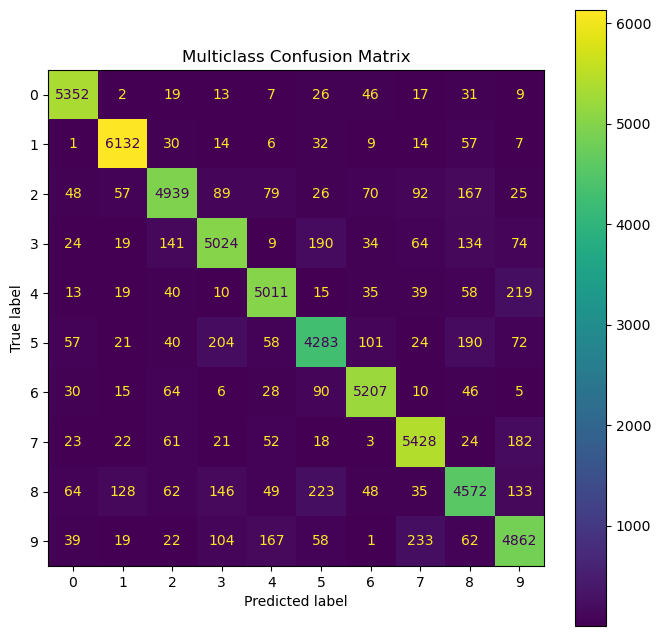

In [15]:
# Cross-validation prediction and confusion matrix for multiclass
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred_multi = cross_val_predict(sgd_clf_multi, X_train, y_train, cv=3)
cm_multi = confusion_matrix(y_train, y_train_pred_multi)
print("Multiclass Confusion Matrix shape:", cm_multi.shape)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay(cm_multi).plot(ax=ax)
plt.title("Multiclass Confusion Matrix")
plt.show()

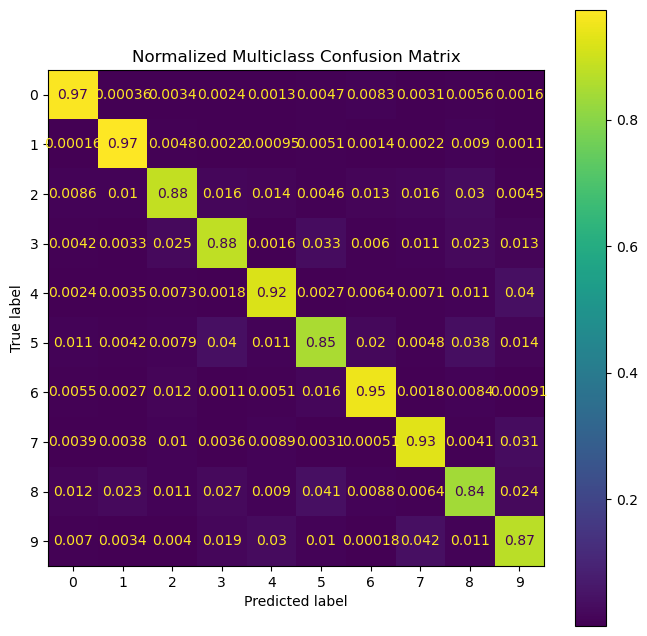

In [16]:
# Normalize the confusion matrix
cm_multi_norm = cm_multi.astype('float') / cm_multi.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,8))
ConfusionMatrixDisplay(cm_multi_norm).plot(ax=ax)
plt.title("Normalized Multiclass Confusion Matrix")
plt.show()

## 6. Run and Display Results for All Tasks
All code cells above can be executed to display results for each task. Please run the notebook sequentially to view outputs and visualizations.